Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Data collection

In [2]:
 #loading the dataset to a pandas dataframe
 wine_dataset=pd.read_csv('/content/winequality-red.csv')

In [3]:
#no of rows and columns
wine_dataset.shape

(1599, 12)

In [4]:
#print 1 st 5 rows of dataset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#checking for missing value
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
#data analysis and visualization
#statistical measure of the dataset
wine_dataset.describe() #used to find mean,std deviation etc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


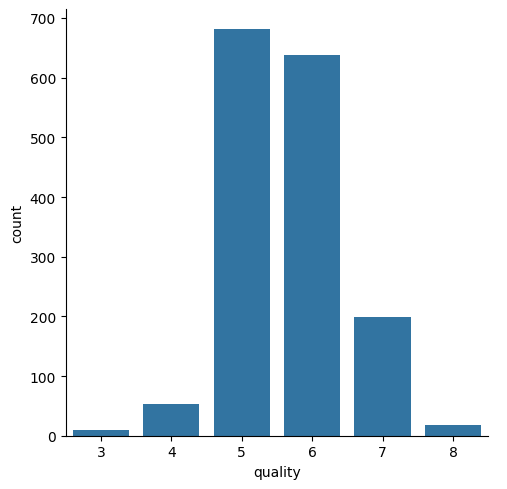

In [7]:
#number of values for each quality
sns.catplot(x='quality',data=wine_dataset,kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

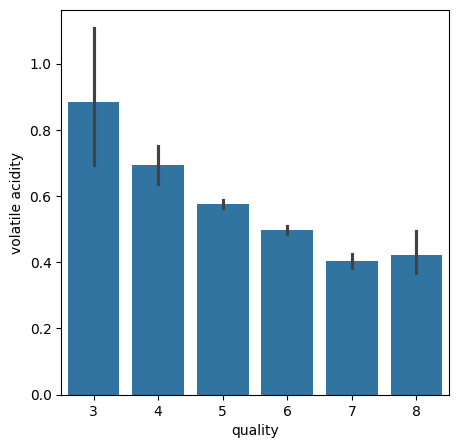

In [8]:
#volatile acidity vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

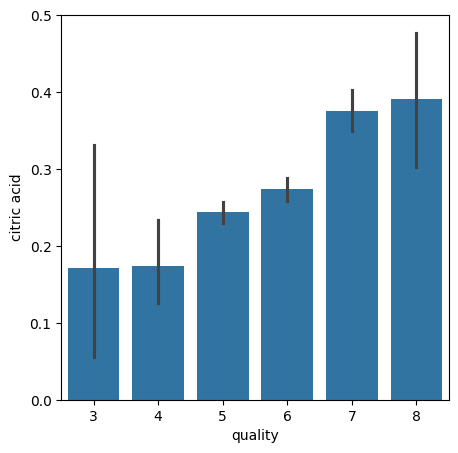

In [9]:
#citric acid vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=wine_dataset)

In [ ]:
#correlation betn data columns


correlation
1.positive correlation
2.negative correlation
correlation=wine_dataset.corr()

In [11]:
correlation=wine_dataset.corr()

<Axes: >

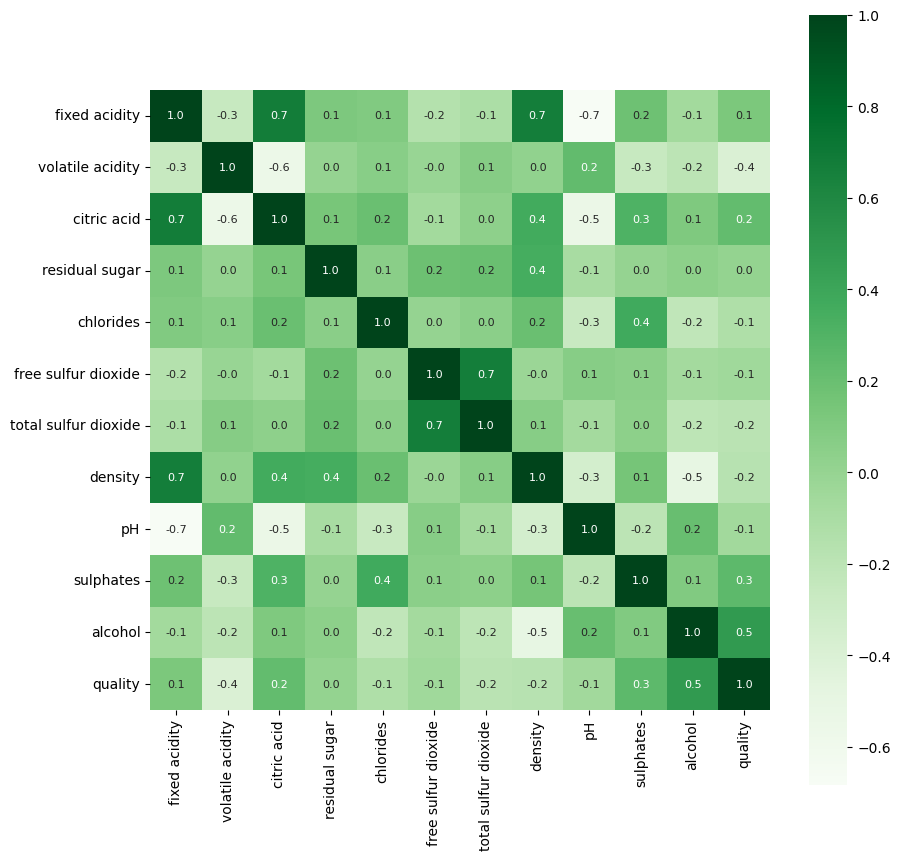

In [13]:
#constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Greens')

In [14]:
#data preprocessing
#separate the data and label
x=wine_dataset.drop('quality',axis=1)
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [15]:
#label binarization
y=wine_dataset['quality'].apply(lambda y_value:1 if y_value>=7 else 0)
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [16]:
#train and test data

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(y.shape,y_train.shape,y_test.shape)

(1599,) (1279,) (320,)


Model training
Random Forest Classifier

In [18]:
model =RandomForestClassifier()

In [19]:
model.fit(x_train,y_train)

RandomForestClassifier()

MOdel evaluation

Accuracy score

In [20]:
#accuracy on test data
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [21]:
print('Accuracy:',test_data_accuracy)

Accuracy: 0.91875
